# The Stroop Effect

In this notebook, we perform an statistical test on a [dataset](./data/stroopdata.csv) from Udacity, which contains data of participants involved in a perceptual test. The name of the test is Stroop test and it know percetual phenomenon in human nature called Stroop effect.


## Content

<ul>
<li><a href="#background">Background on Stroop Effect</a></li>
<li><a href="#variables">Variables Identification</a></li>
<li><a href="#hypothesis">Hypothesis</a></li>
<li><a href="#analysis">Data Analysis</a></li>
    <ul>
    <li><a href="#descriptive">Descriptive Statistics</a></li>
    <li><a href="#eda">Exploratory Data Analysis (EDA)</a></li>
    <li><a href="#stats_test">Statistical Test</a></li>
        <ul>
           <li><a href='#bootstrapping'>Boostrapping</a></li>
           <li><a href='#paired_t-test'>Two-sample Paired t-test</a></li>
           <li><a href='#one-sample_t-test'>One-sample t-test</a></li>
        </ul>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#further">Further Investigation</a></li>
<li><a href="#reference">References</a></li>
</ul>


<a id='background'></a>
## Background on Stroop Effect 


The Stroop effect[[1](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True)] is a psycological phenomenon shown in human reaction to relate concepts (words) to vision (images, colors). In order to understand such relation of concepts and images, psycologists test a participant with two lists of words, which display words in different color of ink. The participant's task is to say the color of the ink of the word shown.   

The task has two scenarios with equally-size lists of words: 
1. **Congruent** words:
Shown words are colored matching the colors in which they are displayed. _Example: <font color="red">RED</font>, <font color="blue">BLUE</font>._
<p></p>
2. **Incongruent** words: 
Shown words are colored, but this time the color of words does not match the word. Thus, the name of incongruent. _Example: <font color="orange">PURPLE</font>, <font color="purple">ORANGE</font>._


For each scenario, one measures the time it takes each participant to go through all words. 

It is important to notice that the colored words congruent or incongruent are stimuli, while the participant's response is a reaction.

>**Note:** The dataset in this notebook contains the times of participants taking a Stroop test.


<a id="variables"></a>
## Variables Identification

In order to start working on our statistical test and choose a hypothesis to test for, we need to define the variables we will investigate and wether if they are independent from or dependent to other factors.

Thus, we ask ourselves the questions: What is the independent variable? What is the dependent variable?

To identify our independent and dependent variables we must ask which facts influence the outcome. In this case we know the words and colors are stimuli and the particpant's answer is a reaction. Thus, we can say that the words and its colors influence the reaction of the participant measured in time units. As a result, we can classify our variables as follow:

**Independent variables**
1. Color of word
2. Word
3. Person (Participant)

Basically, independent variables 1 and 2 refer to our **Congruent/Incongruent** words. 

**Dependent variables**
1. Time, the _reaction time_ of a participant

<a id="hypothesis"></a>
## Hypothesis

Once we identified our independent and dependent variables, we want to make a hypothesis on the outcome of our dependent variables which is the result of our test. Thus, we can ask: What is an appropriate set of hypotheses for this task?

For a Stroop test, the reaction time is our tests' result and dependent variable. In fact, that is what we are interested in comparing and the purpose of having 2 scenarios on the test. We want to look at the reaction time of people in both scenarios and make conclusions on participants' reactions. Therefore, we will compare the reaction time of **Congruent** and **Incongruent** scenarios. Since we need a sample size to run to make a hypothesis test, we will need to consider the average of our congruent's and incongruent's time to be our parameters for the test. Moreover, we know that the same participant did a congruent and incongruent test, thus these two times are related. A comparison between such times lead us to define we need to do a **paired t-test (two-sample paired t-test)** to compare the congruent mean and incongruent mean.[3]

>**Note:** If the a two-sample paired t-test gives the same result of a one-sample t-test if the substract group A's mean - group B's mean and we assume their difference is center in 0. This is another approach to the hypothesis test, so it is important to keep in mind.

For the hypothesis, the traditional thinking believes that the participants' reaction time is the same or maybe even slower when they have congruent words. However, we want to challenge that idea by saying that we believe the participants' have a faster reaction time when color and words match (congruent) than when color and words do not match (incongruent). Thus, we can stablish a hypothesis as follow:

$$H_0: \mu_0 \geq \mu_1$$

$$H_1: \mu_0 < \mu_1$$

where $\mu_0$ is the mean of the time it took people on the sample to read **congruent** words (labels consistent with color)

and $\mu_1$ is the mean of the time it took people on the sample to read **incongruent** words (labels differ from color)

In other words, our hypotheses are:
* **Null hypothesis** ($H_0$). The reaction time of participants when reading congruent words is equal or greater than when they read incongruent words.
* **Alternative hypothesis** ($H_1$). The reaction time of participants when reading congruent words is faster then when reading incongruent words.


<a id='analysis'></a>
## Data Analysis

In this section, we will concentrate on obtaining some statistics of our data and doing some exploration of it. The goal will be to perform the necessary analyses and tests to determine if we reject or show that there is not enough information to reject the null hypothesis $H_0$.

<a id='descriptive'></a>
### Descriptive Statistics

First, we need to understand our data and see what kind of data we have. It is also important to check if we need to clean our dataset or if we were lucky to have gotten one dataset that was preprocessed by someone else and is clean.
Then, we want to verify if our data is close enough to be normally distributed using descriptive statistics such as two central tendency measures (median, mean) and checking for the variability of our data ( we will need to consider the size of the sample to judge this point).

In [1]:
# Packages import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm # for ztest only
%matplotlib inline

/Users/arturops/anaconda/envs/sdcar/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Loading our dataset
path = "data/"
file = 'stroopdata.csv'
df = pd.read_csv(path+file)
df.head(5)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# Display information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


This dataset seems to have been processed by our source. Thus, we will be ok to use it as it is. There is also something important on this dataset and that is the size of it. It seems a fairly small dataset of 24 samples per group (congruent and incongruent) to have a 100% accurate decision when determining if the data is normally distributed, but if the distributions get close to normal we can agree that it is close enough even with this little data.

We can start by calculating the median and mean and see how far apart they are in each group

In [4]:
# Checking the mean and median for both groups
print('Congruent Mean: {:.4f}\nCongruent Median: {:.4f}'.
      format(df['Congruent'].mean(),df['Congruent'].median()))

print('\nIncongruent Mean: {:.4f}\nIncongruent Median: {:.4f}'.
      format(df['Incongruent'].mean(),df['Incongruent'].median()))

Congruent Mean: 14.0511
Congruent Median: 14.3565

Incongruent Mean: 22.0159
Incongruent Median: 21.0175


Right away we can notice the median and the mean for both groups is very close to each other. Thus, we can say our data is close to a normal distribution. It will be good to check the 25% and 75% percentiles, minimum and maximum values to understand a little bit better our data. 

In [5]:
# Checking the 25% and 75% percentiles, min and max values for both groups
p25_congruent = np.percentile(df['Congruent'],25)
p75_congruent = np.percentile(df['Congruent'],75)
print('Congruent [25%,75%] percentiles: [{:.4f},{:.4f}]'.format(p25_congruent,p75_congruent))
print('Congruent (min,max): ({:.4f},{:.4f})'.format(df['Congruent'].min(), df['Congruent'].max()))

p25_incongruent = np.percentile(df['Incongruent'],25)
p75_incongruent = np.percentile(df['Incongruent'],75)
print('\nIncongruent [25%,75%] percentiles: [{:.4f},{:.4f}]'.format(p25_incongruent,p75_incongruent))
print('Incongruent (min,max): ({:.4f},{:.4f})'.format(df['Incongruent'].min(), df['Incongruent'].max()))

Congruent [25%,75%] percentiles: [11.8953,16.2007]
Congruent (min,max): (8.6300,22.3280)

Incongruent [25%,75%] percentiles: [18.7168,24.0515]
Incongruent (min,max): (15.6870,35.2550)


This data corroborates our assumption that the **congruent** group's distribution is normal as we can clearly see now that the mean and median are sitting in between the 25% and 75% percentiles. However, there is something suspicious about our **incongruent** group's distribution, apparently the mean is leaning to the 75% percentile, while the median seems centered in the between the 25% and 75% percentile. Our _incongruent data seems skewed to the right_ as $mean > median$. This might be caused by outliers since the maximum value is further away form the 75% than the minimum value from the 25% percentile. We will explore this later in a graph to make this concept clearer, but as the variance and standard deviation of both groups can tell us their variability (spread).

In [6]:
# Checking the var and STD for both groups
print('Congruent Variance: {:.4f}\nCongruent Std: {:.4f}'.
      format(df['Congruent'].var(),df['Congruent'].std()))

print('\nIncongruent Variance: {:.4f}\nIncongruent Std: {:.4f}'.
      format(df['Incongruent'].var(),df['Incongruent'].std()))

Congruent Variance: 12.6690
Congruent Std: 3.5594

Incongruent Variance: 23.0118
Incongruent Std: 4.7971


As we expected, the **incongruent** group has a high variance and standard deviation as we believe it contains outliers that contribute to the increase in variability. The next step will be to perform an exploratory data analysis to visualize our believes.

<a id="eda"></a>
### Exploratory Data Analysis (EDA)

The first thing we want to confirm is that the dataset has a normal distribution as ou descriptive statistics tells us we might have normal distributions, but also outliers in our incongruent group.

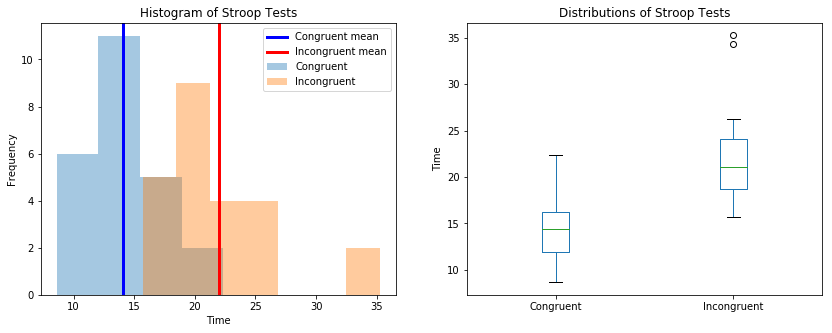

In [7]:
# Histogram and box plot of both groups
plt.figure(figsize=(14,5))

# Histogram
plt.subplot(1,2,1)
sns.distplot(df["Congruent"], norm_hist=False,kde=False, bins=4, label = "Congruent")
sns.distplot(df["Incongruent"], norm_hist=False,kde=False,  bins=7, label = "Incongruent")
plt.axvline(df['Congruent'].mean(),color='b',lw=3,label='Congruent mean')
plt.axvline(df['Incongruent'].mean(),color='r',lw=3,label='Incongruent mean')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Stroop Tests')
plt.legend()

# Box plot
subplot_box =plt.subplot(1,2,2) # position of subplot
df.plot(ax=subplot_box, kind='box')
plt.title('Distributions of Stroop Tests')
plt.ylabel('Time');


The histogram and boxplot clearly show the incongruent group has two outliers that are shifting the mean to the right skewing the distribution to the right. The boxplot also shows that most of the samples in the incongruent group actually live between the 25% and 75% percentile, which is a good indication that the distribution is normal.
The congruent group on the other hand has its mean centered on the highest frequency of the histogram which is as close as the mode and median it can get to indicate a normal distribution. On the box plot, however, we can notice the spread between the minimum and maximum values in the congruent group is larger than the incongruent group. This was not expected as our variance for the congruent group was smaller, but this might be an indicative that if we remove the ouliers from the incongruent group (consecuentively from the congruent group as well) we should find a smaller variance for the incongruent distribution.

However, while removing outliers in one group, we might find there will be an outlier for the other group. This all will depend on our metric to remove outliers. In here, we will consider the boxplot out tool to determine of something is an outlier.

,Congruent,Incongruent
14,18.200,35.255
19,12.369,34.288
10,22.328,24.524


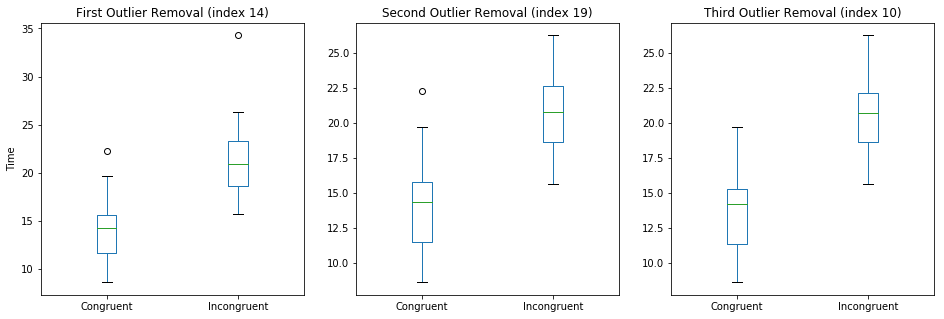

In [8]:
# Removing outliers
plt.figure(figsize=(16,5))

# creating a copy of our dataset in which outliers will be removed
df_clean = df.copy()

# Removing first outlier
sub1 = plt.subplot(1,3,1)
outlier1 = df_clean['Incongruent'].argmax()
df_clean = df_clean.drop([outlier1])
df_clean.plot(ax=sub1, kind='box')
plt.ylabel('Time')
plt.title('First Outlier Removal (index 14)')

# Removing second outlier
sub2 = plt.subplot(1,3,2)
outlier2 = df_clean['Incongruent'].argmax()
df_clean = df_clean.drop([outlier2])
df_clean.plot(ax=sub2, kind='box')
plt.title('Second Outlier Removal (index 19)')

#Removing third outlier (surprisingly found in congruent)
sub3 = plt.subplot(1,3,3)
outlier3 = df_clean['Congruent'].argmax()
df_clean = df_clean.drop([outlier3])
df_clean.plot(ax=sub3, kind='box')
plt.title('Third Outlier Removal (index 10)');

# Displaying the outliers' values
df.loc[[outlier1,outlier2,outlier3]]

From the boxplots we could see that when removing the first outlier, we were found that the congruent group had an outlier. Thus, the removal of two outliers became a task of removing three outliers. The process illustrated above left us with 21 samples. 
Moreover, we now can say that the incongruent group is actually closer to a normal distribution than the congruent group. This will be reflected in our descriptive statistics. 


In [9]:
# Checking the mean, median and standard deviation for both groups
print('Congruent Mean: {:.4f}\nCongruent Median: {:.4f}\nCongruent Std: {:.4f}'.
      format(df_clean['Congruent'].mean(),df_clean['Congruent'].median(), df_clean['Congruent'].std()))

print('\nIncongruent Mean: {:.4f}\nIncongruent Median: {:.4f}\nIncongruent Std: {:.4f}'.
      format(df_clean['Incongruent'].mean(),df_clean['Incongruent'].median(), df_clean['Incongruent'].std()))

Congruent Mean: 13.5395
Congruent Median: 14.2330
Congruent Std: 3.1412

Incongruent Mean: 20.6817
Incongruent Median: 20.7620
Incongruent Std: 2.8259


We can see that the spread (standard deviation) decreased in both groups, which is a good indication that we effectively removed the outliers. The incongruent group in particular got a mean and median almost similar indicating a normal distribution. Moreover, the standard deviation is now smaller than the congruent group which is what we expected to see. However, the congruent group now has a median and mean that are not as close as before. Here we sacrificed the separation in median and mean to gain a tighter distribution by reducing our standard deviation when we removed the congruent outlier.

All in all, we now have a clean dataset which has two distributions closed to normal. This is good enough for us to move onto a hypothesis testing.

>**Note:** Since our dataset is small and this is pyschological test, it is expected to have a large variance. Thus, it is possible to do the analysis with the outliers. In this case, we decided to drop them, but the results won't be affected much if we keep them.

<a id="stats_test"></a>
### Statistical Test

For the purpose of the hypothesis testing, we have two options to do the test. The first one is :

$$H_0: \mu_0 \geq \mu_1$$

$$H_1: \mu_0 < \mu_1$$

in this option we need to use a **two-sample paired t-test** (compare two groups that are related, same participant took both tests: congruent and incongruent) . On the second option, we can use some math to transform our original hypotheis to its equivalent: 

$$H_0: \mu_0 - \mu_1 \geq 0$$

$$H_1: \mu_0 - \mu_1 < 0$$

for this other expression of our hypothesis, we need to use a **one-sample t-test** or we can use **bootstrapping** to run a hypothesis test.

>**Note:** The two-sample paired t-test would first substract the two means and perform an one-sample t-test, so if we want to do a one-sample test we need the substracted samples and the assumption that our mean is centered in 0.

Given that we already know our distributions are fairly close to normal, we are ready to use the mean as our statistic to perform our hypothesis test.


The first thing we do is define our desired confidence interval and as a result the type I error threshold ($\alpha$). In this case, we want to have a high confidence interval as this a test to understand our human reaction time in this Stroop test. Thus, we choose an interval of 99.5%, resulting in $\alpha = 0.005$.


In [10]:
confidence_level = 0.995
alpha = 1 - confidence_level
print('Confidence level is {}%'.format(100.0*confidence_level))
print('Type I error threshold (alpha) is {:.4f}'.format(alpha))

Confidence level is 99.5%
Type I error threshold (alpha) is 0.0050


There are three options to perform the hypothesis test:
* **Bootstrapping**. We simulate the null distribution/population and use our sample statistic to find the p-value (uses hypothesis $\mu_0 - \mu_1 \geq 0$).
* **Two-sample paired t-test**. We need a one-tail test (defined by our hypothesis $\mu_0 \geq \mu_1$). For this test we will use our sample dataset, the t-test uses the sample to approximate population's predictions. This was one of the most used tests before computers as a small sample size could be used for bigger estimations.
* **One-sample t-test**. Instead of using the data for each congruent and incongruent group, we will need to use the difference of congruent-incongruent, and assume our mean is 0 (uses hypothesis $\mu_0 - \mu_1 \geq 0$).

In this notebook, we perform these approaches to prove that they all work and result in similar conclusions.

<a id='bootstrapping'></a>
#### Bootstrapping

The first thing we do for bootstrapping is to calculate our sample mean. 

In this case, our sample mean is $\mu_0 - \mu_1$

In [11]:
# Calculating the mean difference from our dataset (21 samples) 
u_diff = df_clean['Congruent'].mean() - df_clean['Incongruent'].mean()
print('Dataset congruent_mean - incongruent_mean : {:.4f}'.format(u_diff))

Dataset congruent_mean - incongruent_mean : -7.1421


After we have our sample mean, we need to generate all the samples 'congruent - incongruent' time to be able to sample from them and allow bootstrapping to generate the desired distribution.

>**Note:** Since congruent and incongruent time are related variables, it is better for bootstrapping to sample from $\mu_0 - \mu_1$ than to sample $\mu_0$ and $\mu_1$ and compute their difference. 

In [12]:
df_clean['Diff'] = df_clean['Congruent'] - df_clean['Incongruent']
df_clean.head(5)

,Congruent,Incongruent,Diff
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


Then, we sample with replace our $\mu_0 - \mu_1$ dataset a large number of times. For every sample we do, we obtain the mean of each group and the difference of their means.

>**Note:** Doing the sampling is a powerful concept as it intercepts with central limit theorem which says that the distribution of the sample mean is normal.

In this case, we will use 10,000 sample means of size 5 each.

In [13]:
# Using bootstraping
RESAMPLE = 10000

diff = []

# bootstrapping our difference in congruent-incongruent
for _ in range(RESAMPLE):
    diff.append(df_clean['Diff'].sample(5,replace=True).mean())

# converting our samples to numpy array    
diff = np.array(diff)

print('\nDiff mean: {:.4f} Diff median: {:.4f} Diff std: {:.4f}'.
      format(diff.mean(), np.median(diff), diff.std())) 


Diff mean: -7.1652 Diff median: -7.1848 Diff std: 1.4334


After the bootstrapping, we can see that the mean for the bootstrapped statistic is very close to the sample. 

The next step is to visualize our results from bootstrapping using a histogram.

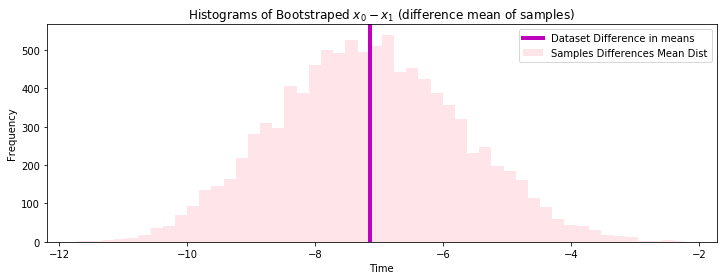

In [14]:
# Histograms of simulated bootstraped groups means difference
plt.figure(figsize=(12,4))
sns.distplot(diff, kde=False, color='pink', label='Samples Differences Mean Dist')
plt.axvline(u_diff,color='m',lw=4,label='Dataset Difference in means')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Histograms of Bootstraped $x_0 - x_1$ (difference mean of samples)')
plt.legend();

Once we visualized our bootstrapped distribution with the dataset mean displayed on it, we can say that the bootstrapped distribution is representative of our dataset. Using this idea, we are able to obtain the standard deviation of our bootstrapped difference samples' mean to simulate the null distribution centered in 0 and using the same number of samples the bootstrapped used.

Then, we will plot the distribution of our null distribution and overlap the boostrapped difference in means and the dataset difference in means. The latter is the one we are ultimately interested.

In [15]:
# Simulating the null distribution
null_vals = np.random.normal(0, diff.std(), RESAMPLE)

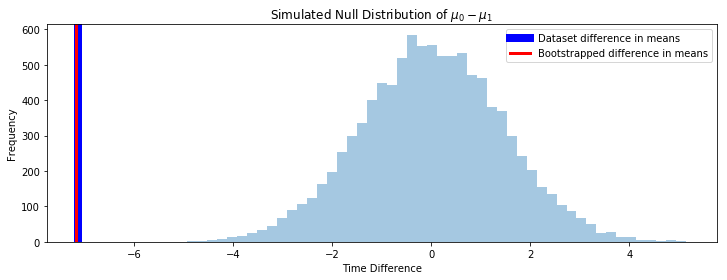

In [16]:
# Histogram of simulated normal null distribution
plt.figure(figsize=(12,4))
sns.distplot(null_vals,kde=False,norm_hist=False)
plt.axvline(u_diff,color='b',lw=8,label='Dataset difference in means')
plt.axvline(diff.mean(),color='r',lw=3,label='Bootstrapped difference in means')
plt.title('Simulated Null Distribution of $\mu_0 - \mu_1$')
plt.xlabel('Time Difference')
plt.ylabel('Frequency')
plt.legend();

From the plot, we can see our sample dataset difference in means $\mu_0 - \mu_1$ is far away to left on the distribution, which is already implying that such mean did not come from the null distribution with a high confidence. We will run a proper hypothesis test, but now we have an idea that most likely we expect to reject the null hypothesis.

In order to do a hypothesis test using bootstrapping, we need:
* **The null distribution** we simulated using the bootstrapping $\mu_0 - \mu_1$ standard deviation
* **Sample dataset $\mu_0 - \mu_1$ **

with the sample dataset $\mu_0 - \mu_1$ we can find the the p-value as a one-tailed test. We do it by finding the mean of all values in the null distribution greater or equal than the sample dataset $\mu_0 - \mu_1$.

Then the confidence interval will be computed as 1 - p-value.

Finally, we will determine if the given p-value is smaller than the type I error threshold and if we can reject the null hypothesis or we do not have enough information to do so.

In [17]:
# Bootstrapping statistical test
print('Dataset {} samples, Statistic(Diff mean): {:.4f}'.format(df_clean.shape[0], u_diff))

print('Boostrapped {} samples, Statistic (Diff mean): {:.4f}'.format(RESAMPLE, diff.mean()))

print('\nHypothesis testing one-tail')
p_val = (u_diff >= null_vals).mean()
confidence_interval = 1 - p_val
print('pval: {:.10f}'.format(p_val))
print('Confidence interval: {:.2f}%'.format(100.0*confidence_interval))
print('\nReject null hypothesis ? {} , pval:{:.10f} < alpha:{:.5f}'.format(p_val<alpha,p_val,alpha))

Dataset 21 samples, Statistic(Diff mean): -7.1421
Boostrapped 10000 samples, Statistic (Diff mean): -7.1652

Hypothesis testing one-tail
pval: 0.0000000000
Confidence interval: 100.00%

Reject null hypothesis ? True , pval:0.0000000000 < alpha:0.00500


After running bootstrapping, we were able to reject the null hypothesis $H_0$ as the $pvalue < \alpha = 0.005$ and our confidence interval is greater than 99.5%

Another way to verify this, if we had the population distribution and parameters, is to use a Zscore test.
Some people consider that the t-test should be used for sample sizes smaller than 30[4]. However, this is not mandatory, it all depends on your analysis and judgment. Since we got a sample size of 24 and we reduce to 21 by eliminating outliers, we wil not use the Z score.

<a id='paired_t-test'></a>
#### Two-sample Paired t-test

Another way to do the hypothesis testing is through a T-test of one-tail using only our sample data.

>**Note:** We used scipy ```ttest_rel()``` with input related samples congruent and incongruent.  We also have to be aware that this function is for two-tailed test, so we need to divide the p-value by 2.
The ```ttest_rel()``` assumes our samples are normally distributed, but if we believed the distribution was not normal, we could use ```wilcoxon()``` which is a two-sample paired t-test for non-normal distributions.

In [18]:
# Scipy statistical test (a-b) - is only accounting for two tails, we need to do math on the p-value :/
sp_tstat, sp_pval = stats.ttest_rel(a=df_clean['Congruent'], b=df_clean['Incongruent'])#, equal_var=False)

sp_pval/=2 #divide pvalue by two because ttest_ind is a two-tailed test

print('Scipy\'s two-sample paired t-test\n Statistic(Diff mean): {:.4f}\n pvalue: {:.10f}\n Confidence Interval: {:.2f}%'.
      format(sp_tstat, sp_pval, 100.0*(1-sp_pval)))
print('\nReject null hypothesis ? {} , pval:{:.10f} < alpha:{:.5f}'.format(sp_pval<alpha,sp_pval,alpha))

Scipy's two-sample paired t-test
 Statistic(Diff mean): -9.8798
 pvalue: 0.0000000019
 Confidence Interval: 100.00%

Reject null hypothesis ? True , pval:0.0000000019 < alpha:0.00500


In this t-test we also found that we have an approximate 100% confidence interval and that our p-value is smaller than alpha. Thus, we have enough information to reject the null hypothesis. 

>**Note:** The p-value and the statistic we use have different values than the bootstrapping analysis. This is due to the fact that a t-test is using only the sample data (not any simulated distribution with tons of samples which is what bootstrapping does). Thus, there are different equations to calculate the t statistic that lead to a different p-value.

<a id='one-sample_t-test'></a>
#### One-sample t-test

As additional step to prove a two-sample paired t-test is at its core a one-sample t-test, we can run a one-sample test using ```ttest_1samp()``` function from scipy. The result should match the two-sample paired t-test as a two-sample paired t-test runs a one-sample t-test after it has the difference in means of both related groups.It also assumes their means centered at 0.

In [19]:
# One-sample t-test - is defined as a two-tailed test, so we must divide the resulting pvalue by 2
onesamp_tstat, onesamp_pval = stats.ttest_1samp(df_clean['Diff'], 0)

onesamp_pval/=2 #divide pvalue by two because ttest_ind is a two-tailed test

print('\nScipy\'s one-sample t-test\n Statistic(Diff mean): {:.4f}\n pvalue: {:.10f}\n Confidence Interval: {:.2f}%'.
      format(onesamp_tstat, onesamp_pval, 100.0*(1-onesamp_pval)))
print('\nReject null hypothesis ? {} , pval:{:.10f} < alpha:{:.5f}'.format(onesamp_pval<alpha,onesamp_pval,alpha))


Scipy's one-sample t-test
 Statistic(Diff mean): -9.8798
 pvalue: 0.0000000019
 Confidence Interval: 100.00%

Reject null hypothesis ? True , pval:0.0000000019 < alpha:0.00500


The results from the two-sample paired t-test matches our result from a one-sample t-test, confirming that at the core of the first we run a one-sample t-test.

In order to prove that our statistic is correct for the two-sample paired t-test and the one-sample t-test we can use the equation for t-test statistic:

$$t = \frac{\bar{x_0}-\bar{x_1}}{\frac{s}{\sqrt{n}}}$$

In [20]:
#Calculating our t-statistic from an equation
n = df_clean['Diff'].shape[0]
t = (df_clean['Congruent'].mean() - df_clean['Incongruent'].mean())/(df_clean['Diff'].std()/np.sqrt(n))
print("T-test statistic: {:.4f}".format(t))

T-test statistic: -9.8798


After implementing the equation above we can see it matches the two-sample paired and one-sample t-statistic we used to compute our p-value. This lead us to conclude that our results match and yield expected values. 

In all cases using bootstrapping and t-tests, the pval < 0.005 which was our $\alpha$ threshold for a Type I error. Thus we have enough information to reject the null hypothesis.

<a id="conclusions"></a>
## Conclusions

The null hypothesis ($H_0$) of our problem is that the reaction time of participants in the Stroop test was greater or equal for congruent words (words colored as their label, e.g. <font color='green'>GREEN</font>, <font color='blue'>BLUE</font>) than for incongruent words (words colored different than their label, e.g. <font color='red'>GREEN</font>, <font color='cyan'>PINK</font>). However, we challenged this idea proposing an alternative hypothesis saying that the reaction time for congruent words was faster than for incongruent words. During our hypothesis test, we decided to choose a confidence level of 99.5% resulting in a type I error threshold of $\alpha = 0.005$. After our hypothesis test using bootstrapping, two-sample paired t-test and one-sample t-test one-tailed tests we got a $pvalue < \alpha$. Since the pvalue was smaller than $\alpha$ we got enough information to reject $H_0$ and conclude that based on our test we have more than 99.5% confidence that the participants have a faster reaction time when going through all the congruent words than when doing the same for incongruent words. This is in fact something we expected because we believed that having color not matching the words make us think more about what we see and what it means. We believe we will need to think more before speaking when looking at incongruent words. In other words, the Stroop effect indeed interferes people’s reaction time on a task when reading incogruent words.

<a id="further"></a>
## Further Investigation

A possible explanation for the Stroop effect is that the humand brain is trained to automatically process words rather than color when looking at text[6]. In other words, the human brain prioritizes some tasks and the way we shaped it is to read before deciding the color of words. As a result, when we are asked to only mention the color of a printed word, we need to step back and analyze the color instead of reading, which can cause a conflict in our automatic reply and give the entrance to our cognitive skill instead of the automatic reply we have developed over the time.

There are some tests that branched from the Stroop effect to analyze humand cognition and sensory reactions. The one test that caught my attention is related to a test in which an arrow is drawn in up, down, left, right pointing positions and in every drawing the arrow has a word inside describing the direction it is pointing to. In the congruent case, the word matchs with the direction of the arrow. In the incongruent case, the arrow and the word would not match. 

## References

[1] Statistics: The Science of Decisions Project Instructions.[https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True)

[2] Kang,Eugine. "Hypothesis Test". [https://medium.com/@kangeugine/hypothesis-test-21795f788f7d](https://medium.com/@kangeugine/hypothesis-test-21795f788f7d) 

[3] Laerd Statistics."Dependent t-test for paired samples".[https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php](https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php)

[4] Statistics How To."T-Score vs. Z-Score: What’s the Difference?"[http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/](http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/)

[5] T-test table. [https://www2.palomar.edu/users/rmorrissette/Lectures/Stats/ttests/ttests.htm](https://www2.palomar.edu/users/rmorrissette/Lectures/Stats/ttests/ttests.htm)

[6] Wikipedia. "Stroop effect". [https://en.wikipedia.org/wiki/Stroop_effect](https://en.wikipedia.org/wiki/Stroop_effect)

[6]Macleod, M. Colin. [“The Stroop effect”](http://imbs.uci.edu/~kjameson/ECST/MacLeod_TheStroopEffect.pdf). Encyclopedia of Color Science and Technology,1,2015.